In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils.functions import nearest

In [2]:
sync_signal = []
synt_t = []

with open("results/rpi_hwsync/hwsync_log.txt", "r") as f:
    for line in f.readlines():
        s, t = line.split(", ")
        sync_signal.append(1 if s == "True" else 0)
        synt_t.append(float(t.replace("\n", "")) * 1000)

In [3]:
lidar_t = np.loadtxt("results/rpi_hwsync/lidar_log.txt")

In [8]:
hwsync_t = np.linspace(synt_t[0], synt_t[-1], int((synt_t[-1] - synt_t[0]) / 100))

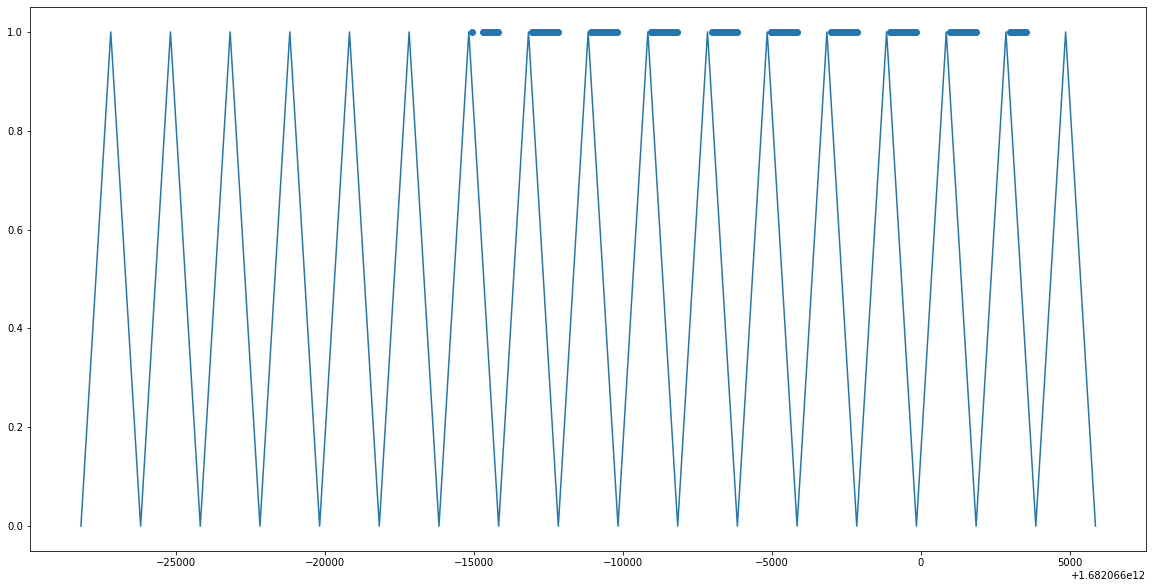

In [11]:
plt.figure(figsize=(20, 10))

plt.plot(synt_t, sync_signal, label="Sync signal")
plt.scatter(lidar_t, np.ones(len(lidar_t)), label="Lidar t")

In [69]:
synt_t = np.array(synt_t, dtype=np.int64)
lidar_t = np.array(lidar_t, dtype=np.int64)

In [70]:
sync_signal = np.array(sync_signal, dtype=np.int64)

In [71]:
synt_t = synt_t[sync_signal == 1]

In [74]:
delay = np.array([nearest(lidar_t, t) - t for t in synt_t])

In [79]:
delay = delay[delay < 200]
delay = delay[delay > 0]

In [81]:
np.mean(delay)

121.6